In [114]:
import pandas as pd
import numpy as np

In [115]:
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [116]:
train = pd.read_csv('titanic_train.csv')

In [117]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [118]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

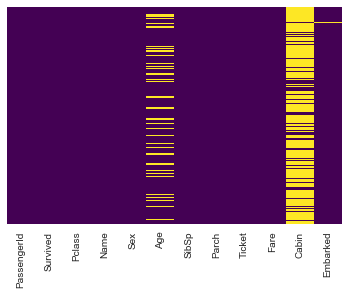

In [119]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [120]:
train.drop(['Name',"Ticket","PassengerId","Cabin"],inplace=True,axis=1)

In [121]:
train.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

In [122]:
train.shape

(891, 8)

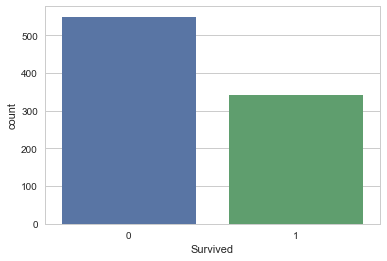

In [123]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",data=train)

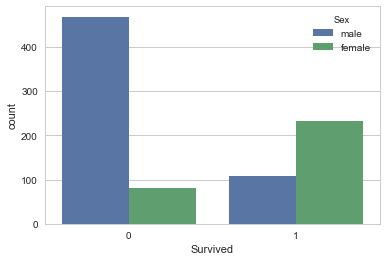

In [124]:
sns.countplot(x="Survived",hue="Sex",data=train)

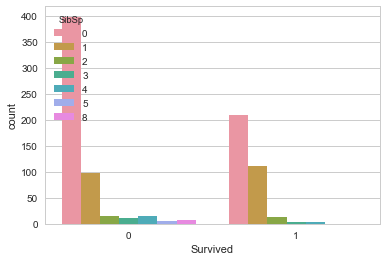

In [125]:
sns.countplot(x="Survived",hue="SibSp",data=train)

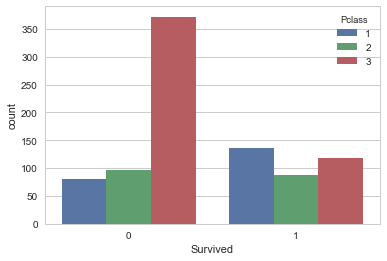

In [126]:
sns.countplot(x="Survived",hue="Pclass",data=train)

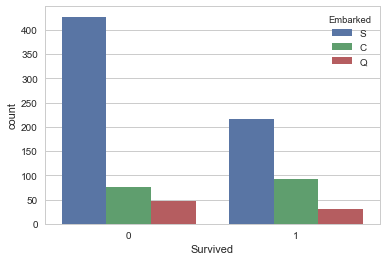

In [127]:
sns.countplot(x="Survived",hue="Embarked",data=train)

/Users/abhisheklomsh/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


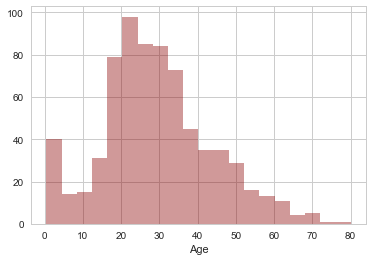

In [128]:
sns.distplot(train["Age"].dropna(),kde=False,color='darkred')

/Users/abhisheklomsh/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


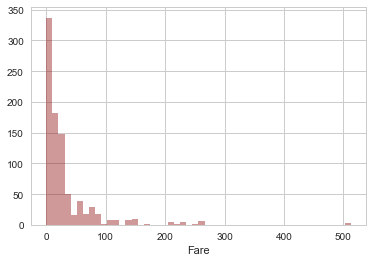

In [129]:
sns.distplot(train["Fare"].dropna(),kde=False,color='darkred')

In [130]:
train.head(3)

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S

In [131]:
sex_dummy_var = pd.get_dummies(train.Sex,drop_first=True)
embarked_dummy_var = pd.get_dummies(train.Embarked,drop_first=True)

In [132]:
pd.concat([train,sex_dummy_var,embarked_dummy_var],axis=1)

Survived  Pclass     Sex   Age  SibSp  Parch      Fare Embarked  male  Q  \
0           0       3    male  22.0      1      0    7.2500        S     1  0   
1           1       1  female  38.0      1      0   71.2833        C     0  0   
2           1       3  female  26.0      0      0    7.9250        S     0  0   
3           1       1  female  35.0      1      0   53.1000        S     0  0   
4           0       3    male  35.0      0      0    8.0500        S     1  0   
5           0       3    male   NaN      0      0    8.4583        Q     1  1   
6           0       1    male  54.0      0      0   51.8625        S     1  0   
7           0       3    male   2.0      3      1   21.0750        S     1  0   
8           1       3  female  27.0      0      2   11.1333        S     0  0   
9           1       2  female  14.0      1      0   30.0708        C     0  0   
10          1       3  female   4.0      1      1   16.7000        S     0  0   
11          1       1  female  58.0      0      0   26.5500        S     0  0   
12          0       3    male  20.0      0      0    8.0500        S     1  0   
13          0       3    male  39.0      1      5   31.2750        S     1  0   
14          0       3  female  14.0      0      0    7.8542        S     0  0   
15          1       2  female  55.0      0      0   16.0000        S     0  0   
16          0       3    male   2.0      4      1   29.1250        Q     1  1   
17          1       2    male   NaN      0      0   13.0000        S     1  0   
18          0       3  female  31.0      1      0   18.0000        S     0  0   
19          1       3  female   NaN      0      0    7.2250        C     0  0   
20          0       2    male  35.0      0      0   26.0000        S     1  0   
21          1       2    male  34.0      0      0   13.0000        S     1  0   
22          1       3  female  15.0      0      0    8.0292        Q     0  1   
23          1       1    male  28.0      0      0   35.5000        S     1  0   
24          0       3  female   8.0      3      1   21.0750        S     0  0   
25          1       3  female  38.0      1      5   31.3875        S     0  0   
26          0       3    male   NaN      0      0    7.2250        C     1  0   
27          0       1    male  19.0      3      2  263.0000        S     1  0   
28          1       3  female   NaN      0      0    7.8792        Q     0  1   
29          0       3    male   NaN      0      0    7.8958        S     1  0   
..        ...     ...     ...   ...    ...    ...       ...      ...   ... ..   
861         0       2    male  21.0      1      0   11.5000        S     1  0   
862         1       1  female  48.0      0      0   25.9292        S     0  0   
863         0       3  female   NaN      8      2   69.5500        S     0  0   
864         0       2    male  24.0      0      0   13.0000        S     1  0   
865         1       2  female  42.0      0      0   13.0000        S     0  0   
866         1       2  female  27.0      1      0   13.8583        C     0  0   
867         0       1    male  31.0      0      0   50.4958        S     1  0   
868         0       3    male   NaN      0      0    9.5000        S     1  0   
869         1       3    male   4.0      1      1   11.1333        S     1  0   
870         0       3    male  26.0      0      0    7.8958        S     1  0   
871         1       1  female  47.0      1      1   52.5542        S     0  0   
872         0       1    male  33.0      0      0    5.0000        S     1  0   
873         0       3    male  47.0      0      0    9.0000        S     1  0   
874         1       2  female  28.0      1      0   24.0000        C     0  0   
875         1       3  female  15.0      0      0    7.2250        C     0  0   
876         0       3    male  20.0      0      0    9.8458        S     1  0   
877         0       3    male  19.0      0      0    7.8958        S     1  0   
878         0       3    male   NaN 

In [134]:
train.drop(["Sex","Embarked"],axis=1)

Survived  Pclass   Age  SibSp  Parch      Fare
0           0       3  22.0      1      0    7.2500
1           1       1  38.0      1      0   71.2833
2           1       3  26.0      0      0    7.9250
3           1       1  35.0      1      0   53.1000
4           0       3  35.0      0      0    8.0500
5           0       3   NaN      0      0    8.4583
6           0       1  54.0      0      0   51.8625
7           0       3   2.0      3      1   21.0750
8           1       3  27.0      0      2   11.1333
9           1       2  14.0      1      0   30.0708
10          1       3   4.0      1      1   16.7000
11          1       1  58.0      0      0   26.5500
12          0       3  20.0      0      0    8.0500
13          0       3  39.0      1      5   31.2750
14          0       3  14.0      0      0    7.8542
15          1       2  55.0      0      0   16.0000
16          0       3   2.0      4      1   29.1250
17          1       2   NaN      0      0   13.0000
18          0       3  31.0      1      0   18.0000
19          1       3   NaN      0      0    7.2250
20          0       2  35.0      0      0   26.0000
21          1       2  34.0      0      0   13.0000
22          1       3  15.0      0      0    8.0292
23          1       1  28.0      0      0   35.5000
24          0       3   8.0      3      1   21.0750
25          1       3  38.0      1      5   31.3875
26          0       3   NaN      0      0    7.2250
27          0       1  19.0      3      2  263.0000
28          1       3   NaN      0      0    7.8792
29          0       3   NaN      0      0    7.8958
..        ...     ...   ...    ...    ...       ...
861         0       2  21.0      1      0   11.5000
862         1       1  48.0      0      0   25.9292
863         0       3   NaN      8      2   69.5500
864         0       2  24.0      0      0   13.0000
865         1       2  42.0      0      0   13.0000
866         1       2  27.0      1      0   13.8583
867         0       1  31.0      0      0   50.4958
868         0       3   NaN      0      0    9.5000
869         1       3   4.0      1      1   11.1333
870         0       3  26.0      0      0    7.8958
871         1       1  47.0      1      1   52.5542
872         0       1  33.0      0      0    5.0000
873         0       3  47.0      0      0    9.0000
874         1       2  28.0      1      0   24.0000
875         1       3  15.0      0      0    7.2250
876         0       3  20.0      0      0    9.8458
877         0       3  19.0      0      0    7.8958
878         0       3   NaN      0      0    7.8958
879         1       1  56.0      0      1   83.1583
880         1       2  25.0      0      1   26.0000
881         0       3  33.0      0      0    7.8958
882         0       3  22.0      0      0   10.5167
883         0       2  28.0      0      0   10.5000
884         0       3  25.0      0      0    7.0500
885         0       3  39.0      0      5   29.1250
886         0       2  27.0      0      0   13.0000
887         1       1  19.0      0      0   30.0000
888         0       3   NaN      1      2   23.4500
889         1       1  26.0      0      0   30.0000
890         0       3  32.0      0      0    7.7500

[891 rows x 6 columns]

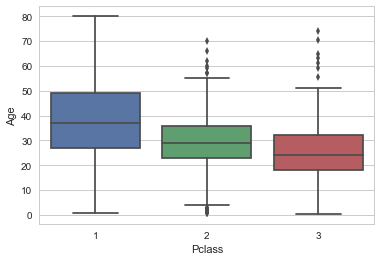

In [135]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [171]:
def fill_age(cols):
    age = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 25
    else:
        return age


In [172]:
train['Age'] = train[['Age','Pclass']].apply(fill_age,axis=1)